# Matplotlib

## Working with Multiple Figures

In [1]:
# installs wget for downloading files
!pip install wget

# install pycroscopy for loading ibw files
!pip install pycroscopy

# installs ncempy for loading dm3 files
!pip install ncempy

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=fc88c36e37b6538ba837a8e338ad96dd1c937b8eef0d29d22e455ab918eba4ad
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
     |████████████████████████████████| 348kB 2.8MB/s 
     |████████████████████████████████| 788kB 12.2MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 153kB 13.8MB/s 
     |████████████████████████████████| 358kB 13.7MB/s 
     |████████████████████████████████| 481kB 16.4MB/s 
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.7-cp36-none-any.whl size=21326 sha256=5b015dcf72fa2ad14ea9e7cc4aa20f631a4c9a400dd8c8f576e5cf86e242bea3
  Stored in directory: /root/.cache/pip/wheels/9e/19/02/30e0a1918ddc498ccdd5dab91b3bfce6100bfd0d416db622c9
  Created wheel for igor: filename=igor-0.3-cp36-none-any.whl size=52097 sha256=e67cef1209d242f6c114be43c29e933a0a45e2

     |████████████████████████████████| 276kB 2.8MB/s 


In [9]:
import wget
import pycroscopy as px
import h5py
import pyUSID as usid
import matplotlib.pyplot as plt
from ncempy.io import dm
from numpy import genfromtxt
import pandas as pd
import numpy as np
from matplotlib import image

In [3]:
urls = ['https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/Data/gb_5_HAADF.dm3?raw=true',
        'https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/Data/SP128_NSO_VPFM0001.ibw?raw=true',
        'https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/Data/Data.xlsx?raw=true',
        'https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/Data/Data.csv?raw=true']

# loops around the list of URLs
for url in urls:
  
  print(url.split('/')[-1].split('?')[0]) # prints the string to save the file

  wget.download(url, url.split('/')[-1].split('?')[0]) # downloads and saves the file

wget.download('https://www2.lehigh.edu/sites/www2/files/2020-02/Hulvat-4710.jpg','lehigh.jpg')

gb_5_HAADF.dm3
SP128_NSO_VPFM0001.ibw
Data.xlsx
Data.csv


'lehigh.jpg'

In [4]:
# file path for ibw file
file_path = '/content/SP128_NSO_VPFM0001.ibw'

# instanciates the translator
translator = px.io.translators.IgorIBWTranslator()

# translates the file to h5
h5_path = translator.translate(file_path)

/usr/local/lib/python3.6/dist-packages/pyUSID/io/hdf_utils/simple.py:1081: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')


(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)


/usr/local/lib/python3.6/dist-packages/pyUSID/io/usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)


In [17]:
# loads the dm3 file
im0 = dm.dmReader('gb_5_HAADF.dm3')

# views the content of the dm3 file
print(im0)

{'filename': 'gb_5_HAADF.dm3', 'data': array([[123776, 119999, 145032, ..., 108778, 133652, 143406],
       [135786, 114320, 128988, ..., 128832, 116860, 122100],
       [125750, 109618,  96203, ..., 143855, 133351, 130286],
       ...,
       [144297, 152625, 160137, ..., 138531, 141589, 151387],
       [129856, 102117, 124561, ..., 150067, 146443, 145031],
       [129460, 105144, 114505, ..., 111008, 132587, 146922]],
      dtype=uint32), 'pixelUnit': ['nm', 'nm'], 'pixelSize': [0.077714294, 0.077714294], 'pixelOrigin': [0.0, 0.0], 'coords': [array([ 0.        ,  0.07771429,  0.15542859,  0.23314288,  0.31085718,
        0.38857147,  0.46628577,  0.54400006,  0.62171435,  0.69942865,
        0.77714294,  0.85485724,  0.93257153,  1.01028582,  1.08800012,
        1.16571441,  1.24342871,  1.321143  ,  1.3988573 ,  1.47657159,
        1.55428588,  1.63200018,  1.70971447,  1.78742877,  1.86514306,
        1.94285735,  2.02057165,  2.09828594,  2.17600024,  2.25371453,
        2.3314288

In [5]:
# reads the H5 file
h5_f = h5py.File(h5_path, 'r+')

In [6]:
# prints the tree where the data is stored
usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data
  ├ Channel_001
    -----------
    ├ Raw_Data
  ├ Channel_002
    -----------
    ├ Raw_Data
  ├ Channel_003
    -----------
    ├ Raw_Data
  ├ Channel_004
    -----------
    ├ Raw_Data
  ├ Channel_005
    -----------
    ├ Raw_Data
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values


In [7]:
# gets the main datasets
main_dset = usid.hdf_utils.get_all_main(h5_f)

# prints the information about the main datasets
print(main_dset)

/usr/local/lib/python3.6/dist-packages/pyUSID/io/usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


[<HDF5 dataset "Raw_Data": shape (1048576, 1), type "<f4">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	HeightRetrace (m) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 1024 
	X - size: 1024 
Spectroscopic Dimensions: 
	arb - size: 1
Data Type:
	float32, <HDF5 dataset "Raw_Data": shape (1048576, 1), type "<f4">
located at: 
	/Measurement_000/Channel_001/Raw_Data 
Data contains: 
	Amplitude1Retrace (m) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 1024 
	X - size: 1024 
Spectroscopic Dimensions: 
	arb - size: 1
Data Type:
	float32, <HDF5 dataset "Raw_Data": shape (1048576, 1), type "<f4">
located at: 
	/Measurement_000/Channel_002/Raw_Data 
Data contains: 
	Amplitude2Retrace (m) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 1024 
	X - size: 1024 
Spectroscopic Dimensions: 
	arb - size: 1
Data Type:
	float32, <HDF5 dataset "Raw_Data": shape (1048576, 1), type "<f4">
located at: 
	/Measureme

In [10]:
# looks at the shape of the h5 file
np.array(h5_f['/Measurement_000/Channel_000/Raw_Data']).shape

(1048576, 1)

In [11]:
my_data = genfromtxt('Data.csv', delimiter=',',skip_header=1) # loads the csv file

# prints the csv file data
print(my_data)

[[ 0.          0.          1.        ]
 [ 0.01        0.00999983  0.99995   ]
 [ 0.02        0.01999867  0.99980003]
 ...
 [ 9.97       -0.51860795  0.86851002]
 [ 9.98       -0.527132    0.86425339]
 [ 9.99       -0.53560334  0.85996087]]


In [12]:
# loads the xlsx file into a pandas dataframe
data_xlsx = pd.read_excel('Data.xlsx')

In [13]:
# prints the header of the dataframe
data_xlsx.head()

,X,sin(x),cos(x)
0,0.00,0.000000,1.000000
1,0.01,0.010000,0.999950
2,0.02,0.019999,0.999800
3,0.03,0.029996,0.999550
4,0.04,0.039989,0.999201


In [14]:
# loads the image file using matplotlib
image_file = image.imread('lehigh.jpg')

In [15]:
# looks at the shape of the image file
image_file.shape

(638, 1080, 3)

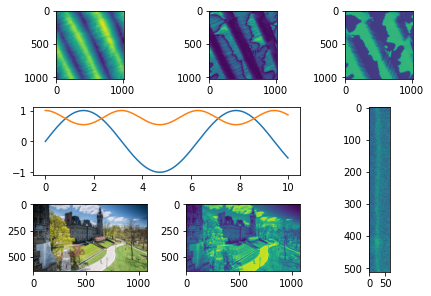

In [18]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# builds the figure
fig = plt.figure(constrained_layout=True)

# uses gridspec to define the position of the axis
gs = GridSpec(3, 3, figure=fig)

# adds all the axis
ax1 = fig.add_subplot(gs[0, 0])
ax11 = fig.add_subplot(gs[0,1])
ax12 = fig.add_subplot(gs[0,2])
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

# creates a list for the 3 AFM images
ax_list = [ax1, ax11, ax12]

# iterates around each graph in a list plotting the i*2 channel
for i, ax in enumerate(ax_list): 
  # prints the name of the channel plotting
  #print(f'/Measurement_000/Channel_00{i*2}/Raw_Data')
  
  # plots the graph, fstring used for indexing. Reshape used to make 2d image
  ax.imshow(np.array(h5_f[f'/Measurement_000/Channel_00{i*2}/Raw_Data']).reshape(1024,1024))

# plots the dm3 file
ax3.imshow(im0['data'])

# plots the data from the csv file
ax2.plot(my_data[:,0],my_data[:,1])

# plots the data from the xlsx file
ax2.plot(data_xlsx['X'],data_xlsx['cos(x)'])

# plots the image of Lehigh
ax4.imshow(image_file)

# plots the R color channel from the Lehigh image.
ax5.imshow(image_file[:,:,0])

# saves the figure at an image.
plt.savefig('fig.png', dpi = 300)

# saves the figure as a scaled vector graphic 
plt.savefig('fig.svg', dpi = 300)

### Loading Data from a variety of sources

## Parts of a Figure
![](https://matplotlib.org/_images/anatomy.png)

# Graphical Integrity

# Color scales

# More details about perceptually correct colormaps

# Choosing Colors for your Figures

# Types of Graphs

# Violin Plots
* Like a box plot but provides a deeper understanding of data density
* Good when you have large datasets

# 2D Density Plot
* Used to compare 2D quantitative information
* Good for small data sets
* When the density of data is high (shouldn't use a scatter plot)

# Correlogram
A correlogram or correlation matrix allows to analyse the relationship between each pair of numerical variables of a matrix.

# Dendrogram
* A dendrogram or tree diagram allows to illustrate the hierarchical organisation of several entities.

# Graph Structures
* Show interconnections between a set of entities. 
* Each entity is represented by a Node (or vertices). 
* Connection between nodes are represented through links (or edges).
* Directed or undirected, weighted or unweighted.

# Guiding Principles

# WTF Graphs

# Assignment: 

Take a graph that you have previously used for a publication or assignment and recreate it based on concepts discussed in class. Please provide the original image and the updated image exported from python.